In [1]:
def clasificationPerformance(ground_truth, computed_values, label):
    """
    Returneaza TN (True Negative), FP(False Positive), FN(False Negative), TP(True Positive)
    """
    TN = 0
    FP = 0
    FN = 0
    TP = 0
    
    for i in range(0, len(ground_truth)):
        #consideram malign = positive, benign = negative 
        if ground_truth[i] == label:
            if computed_values[i] == label:
                TP += 1
            else:
                FP += 1
        else:
            if computed_values[i] != label:
                TN += 1
            else:
                FN += 1
    return TN, FP, FN, TP


def getAccuracy(TN, FP, FN, TP):
    """ 
    accuracy represents the overall performance of classification model:
    (TP+TN)/(TN+FP+FN+TP)
    """
    if TN + FP + FN + TP == 0:
        return 0
    return (TP+TN)/(TN+FP+FN+TP)

def getPrecision(FP, TP):
    """
    precision indicates how accurate the positive predictions are 
    TP/(TP+FP)
    """
    if TP + FP == 0:
        return 0
    return TP/(TP+FP)

def getRecall(TP, FN):
    """ 
    recall indicates the coverage of actual positive sample
    TP/(TP+FN)
    """
    if TP + FN == 0:
        return 0
    return TP/(TP+FN)


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
import pandas as pd 
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy.special import expit
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
def readData():
   X = iris.data.features 
   y = iris.data.targets 
   data = {
        "sepal length": preprocessing.normalize([X["sepal length"]])[0],
        "sepal width": preprocessing.normalize([X["sepal width"]])[0],
        "petal length": preprocessing.normalize([X["petal length"]])[0],
        "petal width": preprocessing.normalize([X["petal width"]])[0],
        "class": y["class"]
    }
   dataFrame = pd.DataFrame(data)
   return dataFrame

def plotDataDistribution(dataFrame):
    fig, axes = plt.subplots(nrows=5, figsize=(15,15))
    axes[0].hist(dataFrame["sepal length"])
    axes[0].set_title("Sepal length")
    axes[1].hist(dataFrame["sepal width"])
    axes[1].set_title("Sepal width")
    axes[2].hist(dataFrame["petal length"])
    axes[2].set_title("Petal length")
    axes[3].hist(dataFrame["petal width"])
    axes[3].set_title("Petal width")
    axes[4].hist(dataFrame["class"])
    axes[4].set_title("Class")
    plt.show()

def getTrainingAndValidationSets(dataFrame):
    dataSize = dataFrame.shape[0]
    
    trainingIndexSet = np.random.choice(range(dataSize), size=int(0.8 * dataSize), replace=False)
    validationIndexSet = [i for i in range(dataSize) if i not in trainingIndexSet]

    trainingInputSet = [[dataFrame["sepal length"].iloc[index], dataFrame["sepal width"].iloc[index], dataFrame["petal length"].iloc[index], dataFrame["petal width"].iloc[index]] for index in trainingIndexSet]
    trainingOutputSet = [dataFrame["class"].iloc[index] for index in trainingIndexSet]

    validationInputSet = [[dataFrame["sepal length"].iloc[index], dataFrame["sepal width"].iloc[index], dataFrame["petal length"].iloc[index], dataFrame["petal width"].iloc[index]] for index in validationIndexSet]
    validationOutputSet = [dataFrame["class"].iloc[index] for index in validationIndexSet]

    return trainingInputSet, trainingOutputSet, validationInputSet, validationOutputSet

def getRegressorFromLibrary(dataFrame):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dataFrame)
    X = [el for el in trainingInputSet]
    regressor = linear_model.SGDClassifier();
    regressor.fit(X, trainingOutputSet)
    return regressor

# def getErrors(dataFrame):
#     #setosa binar = 001
#     #versicolor binar = 010
#     #virginica binar = 100
#     iris_setosa = 1
#     iris_versicolor = 2
#     iris_virginica = 3
    
#     _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dataFrame)
#     regressor = getRegressorFromLibrary(dataFrame)
#     error = 0.0
#     for i in range(0, len(validationInputSet)):
#         if validationOutputSet[i] == "Iris-setosa":
#             index = iris_setosa - 1
#         elif validationOutputSet[i] == "Iris-versicolor":
#             index = iris_versicolor - 1
#         else:
#             index = iris_virginica - 1
#         w0, w1, w2, w3, w4 = regressor.intercept_[0], regressor.coef_[index][0], regressor.coef_[index][1], regressor.coef_[index][2], regressor.coef_[index][3]
#         f = w0  + w1 * validationInputSet[i][0] + w2 * validationInputSet[i][1] + w3 * validationInputSet[i][2] + w4 * validationInputSet[i][3]
#         error += f
#     error /= len(validationInputSet)
#     return error

def getErrors(dataFrame):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dataFrame)
    regressor = getRegressorFromLibrary(dataFrame)
    labels = set(dataFrame["class"])

    computedOutput = regressor.predict(validationInputSet)
    for label in labels:
        TN, FP, FN, TP = clasificationPerformance(validationOutputSet, computedOutput, label)
        accuracy = getAccuracy(TN, FP, FN, TP)
        precision = getPrecision(FP, TP)
        recall = getRecall(TP, FN)
        print(label)
        print("Accuracy = ", accuracy)
        print("Precision = ", precision)
        print("Recall = ", recall)
        print()


# PROBLEMA 3 - Ce fel de floare preferi?

## Distributia datelor

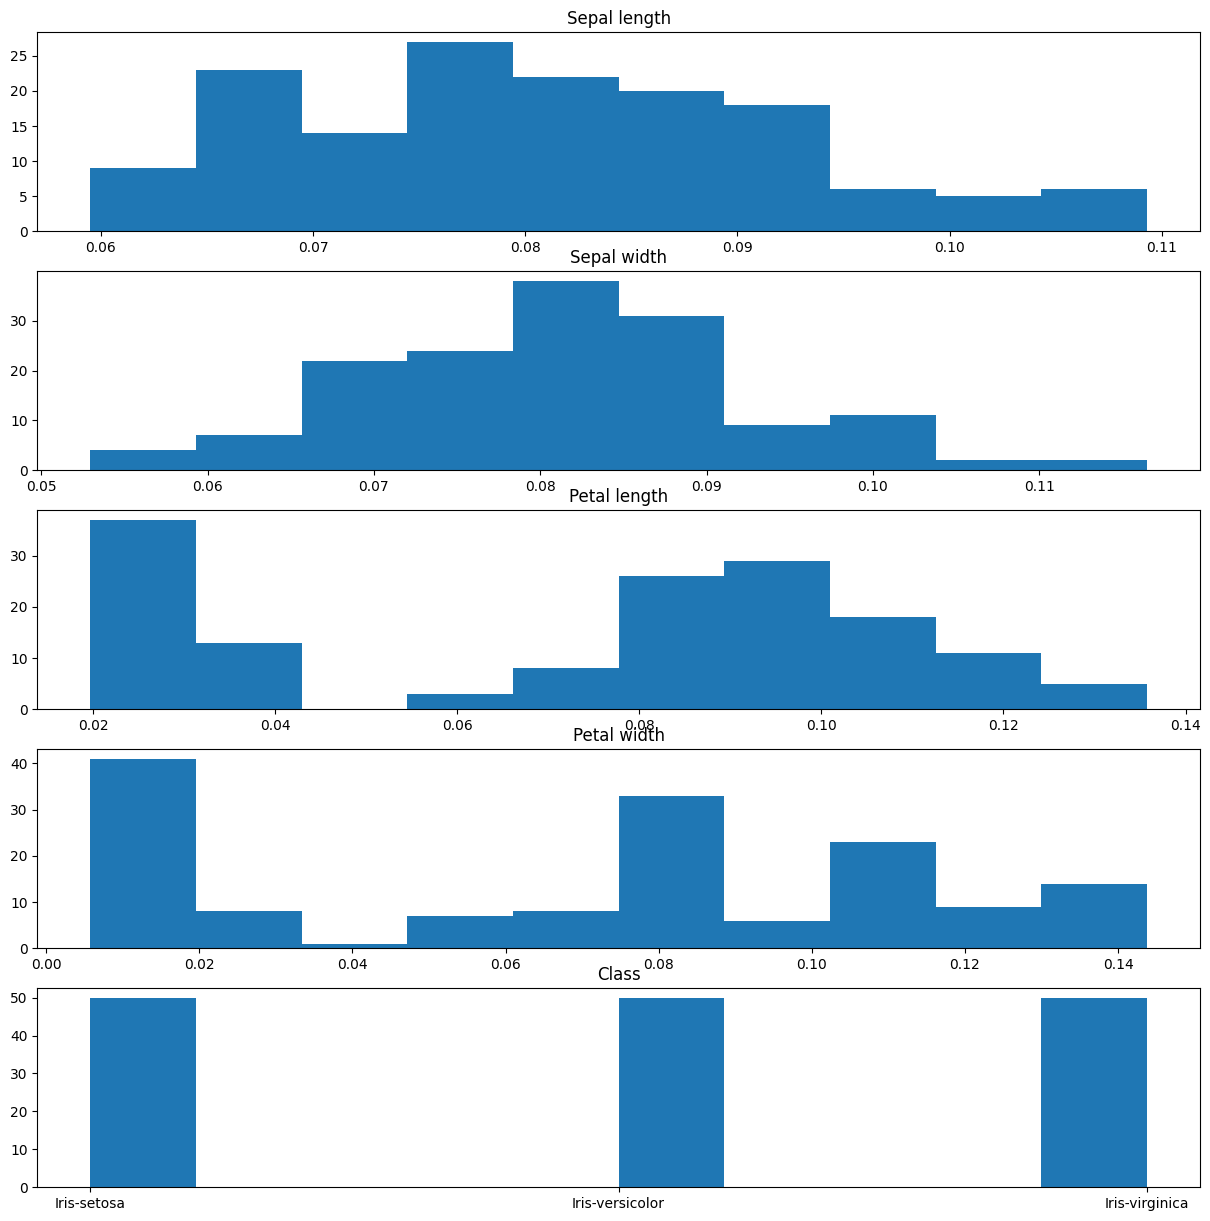

In [3]:
dataFrame = readData()
plotDataDistribution(dataFrame)

## Formula regresor + erori

In [4]:
regressor = getRegressorFromLibrary(dataFrame)
w0, w1, w2, w3, w4 = regressor.intercept_[0], regressor.coef_[0][0], regressor.coef_[0][1], regressor.coef_[0][2], regressor.coef_[0][3]
print("f(x) = ", w0, " + ", w1, "*x1 + ", w2, "*x2 + ", w3, "*x3 + ", w4, "*x4")
getErrors(dataFrame)

f(x) =  2.822385379414773  +  -6.358628804290731 *x1 +  11.015378655358939 *x2 +  -30.944747877817974 *x3 +  -34.48943562152279 *x4
Iris-virginica
Accuracy =  0.8666666666666667
Precision =  0.8571428571428571
Recall =  0.6666666666666666

Iris-versicolor
Accuracy =  0.8
Precision =  0.6153846153846154
Recall =  0.8888888888888888

Iris-setosa
Accuracy =  0.9333333333333333
Precision =  1.0
Recall =  0.8333333333333334



# Regresor propriu

In [9]:
class MyRegressor:
    def __init__(self) -> None:
        self.coeficienti = {}
    
    def computeValue(self, line):
        numbers = {}
        for label in self.coeficienti.keys():
            nr = 0
            for i in range(0, len(line)):
                nr += line[i] * self.coeficienti[label][i]
            numbers[label] = nr
        return numbers
    
    def train(self, input, output, learning_rate=0.01, epochs=10000):
        newInput = [[1] + line for line in input]

        labelSet = set(output)
        for label in labelSet:
            self.coeficienti[label] = []
            for feature in range(0, len(newInput[-1])):
                self.coeficienti[label].append(0.0)

        for epoch in range(0, epochs):
            error = {}
            for label in labelSet:
                error[label] = [0 for i in range(0, len(newInput[-1]))]
            for i in range(0, len(newInput)):
                computedValue = self.computeValue(newInput[i])
                err = {}
                for label in labelSet:
                    if output[i] == label:
                        err[label] = 1 - computedValue[label]
                    else:
                        err[label] = 0 - computedValue[label]

                for label in labelSet:
                    for j in range(0, len(newInput[-1])):
                        error[label][j] += err[label] * newInput[i][j]

            for label in labelSet:            
                for coef_index in range(0,len(self.coeficienti[label])):
                    self.coeficienti[label][coef_index] = self.coeficienti[label][coef_index] + learning_rate * error[label][coef_index]/len(newInput)         

    def labelWithGreatestValue(self, labels):
        max = 0
        maxLabel = None
        for label in labels.keys():
            if labels[label] > max:
                max = labels[label]
                maxLabel = label
        return maxLabel

    def predict(self, input):
        output = []
        for line in input:
            value = self.computeValue([1] + line)
            label = self.labelWithGreatestValue(value)              
            output.append(label)
        return output
    

def getRegressor(dataFrame):
    trainingInputSet, trainingOutputSet, _, _ = getTrainingAndValidationSets(dataFrame)
    X = [el for el in trainingInputSet]
    regressor = MyRegressor()
    regressor.train(X, trainingOutputSet)
    return regressor

def getErrors2(dataFrame):
    _,_, validationInputSet, validationOutputSet = getTrainingAndValidationSets(dataFrame)
    regressor = getRegressor(dataFrame)
    labels = set(dataFrame["class"])

    computedOutput = regressor.predict(validationInputSet)
    for label in labels:
        TN, FP, FN, TP = clasificationPerformance(validationOutputSet, computedOutput, label)
        accuracy = getAccuracy(TN, FP, FN, TP)
        precision = getPrecision(FP, TP)
        recall = getRecall(TP, FN)
        print(label)
        print("Accuracy = ", accuracy)
        print("Precision = ", precision)
        print("Recall = ", recall)
        print()

## Functia regresor

In [13]:
regressor2 = getRegressor(dataFrame)
w0, w1, w2, w3, w4 = regressor2.coeficienti["Iris-setosa"][0],  regressor2.coeficienti["Iris-setosa"][1], regressor2.coeficienti["Iris-setosa"][2], regressor2.coeficienti["Iris-setosa"][3], regressor2.coeficienti["Iris-setosa"][4]
print("f(x) = ", w0, " + ", w1, "*x1 + ", w2, "*x2 + ", w3, "*x3 + ", w4, "*x4")
getErrors2(dataFrame)


f(x) =  0.5604167384678197  +  -0.3001095794940368 *x1 +  0.37392867148269443 *x2 +  -1.313965803292361 *x3 +  -1.5774479548945106 *x4
Iris-virginica
Accuracy =  0.8
Precision =  1.0
Recall =  0.5384615384615384

Iris-versicolor
Accuracy =  0.8
Precision =  0.5
Recall =  1.0

Iris-setosa
Accuracy =  1.0
Precision =  1.0
Recall =  1.0



# Predictia speciei unei flori de iris care are sepala lunga de 5.35 cm si lata de 3.85 cm, iar petala lunga de 1.25 cm si lata de 0.4cm

In [11]:
def predictUsingMyRegressor(dataFrame, input):
    regressor = getRegressor(dataFrame)
    output = regressor.predict(input)
    return output

def predictUsingLibraryRegressor(dataFrame, input):
    regressor = getRegressorFromLibrary(dataFrame)
    output = regressor.predict(input)
    return output

In [12]:
input = [[5.35, 3.85, 1.25, 0.4]]
myOutput = predictUsingMyRegressor(dataFrame,input)
libraryOutput = predictUsingLibraryRegressor(dataFrame, input)
print("What my regressor predicted: ", myOutput)
print("What the library regressor predicted: ", libraryOutput)

What my regressor predicted:  ['Iris-virginica']
What the library regressor predicted:  ['Iris-virginica']
